<a href="https://colab.research.google.com/github/RizkyPradhitia/Machine-Learning-Deep-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fw; fw("ignore")
from sklearn import cluster
from sklearn.metrics import silhouette_score

In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


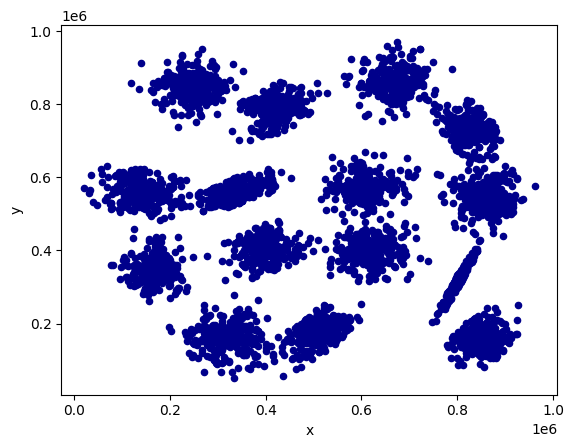

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

Jumlah Cluster : 15
Best Silhouette Score 0.711278614093076


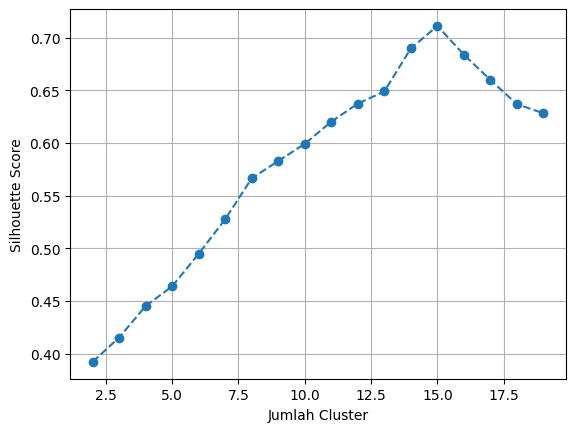

In [ ]:
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_


    score= silhouette_score(data, labels)
    silhouette_scores.append(score)


best_num_clusters = np.argmax(silhouette_scores) + 2
best_silhouette_score = max(silhouette_scores)

print(f"Jumlah Cluster : {best_num_clusters}")
print(f"Best Silhouette Score {best_silhouette_score}")


plt.plot(range(2, 20), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = labels
result.head(2000)
#END CODE

,x,y,cluster
0,664159,550946,2
1,665845,557965,2
2,597173,575538,2
3,618600,551446,2
4,635690,608046,2
...,...,...,...
1995,133744,308918,8
1996,216209,437830,8
1997,156945,339397,8
1998,199859,316334,8


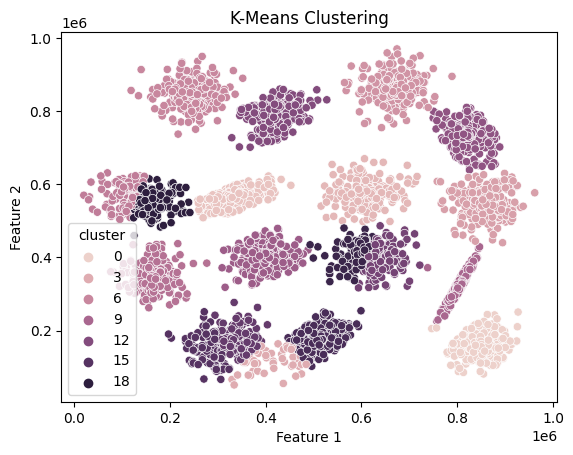

In [ ]:
sns.scatterplot(
    x=result['x'],
    y=result['y'],
    hue=result['cluster'],
    data=result,
)

# Tambahkan label dan judul ke plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')

# Tampilkan plot
plt.show()
